<a href="https://colab.research.google.com/github/po1itepeop1e/Sentiments-Analysis/blob/main/store_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project - Store Sales Forecasting**

***1. Brief description of the problem and data***

*The project is to predict the sales for a large number of product families sold at Favorita stores in Ecuador. The training data includes dates, store and product information, information on whether the product was being promoted, as well as the sales numbers. There are additional files that provide supplementary information which may be useful in building models.*
*The dataset contains 54 stores and 33 product families. The time series begins on January 1, 2013 and ends on August 31, 2017. The provided data is split into two sets: training and testing. The dates in the test data are 15 days after the last date in the training data, and this information will be crucial for defining a cross-validation strategy and creating new features.*

*The dataset contains 54 stores and 33 product families. The time series begins on January 1, 2013 and ends on August 31, 2017. The provided data is split into two sets: training and testing. The dates in the test data are 15 days after the last date in the training data, and this information will be crucial for defining a cross-validation strategy and creating new features.*



In [5]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'store-sales-time-series-forecasting:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F29781%2F2887556%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240202%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240202T153936Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8b2f03360441235c5afe144f777be458d6b2af92c934cb261e7b8f10b41161c920b5d839b3e36fab1d87e0f7a21a8cacfb23a01f3408922c8a6dddafd4c2d2a51e7ba0d7bef3e38527b46443260e39621daeb0c82c0638a68572f3cb0ad29f027b2650bd87f422bc714bd1367c145e7e9414eb44852a0a2e77c0b0b6e63963008cdd9b56e488ae4589e5d3b57776e5546bdacda945e664641bd7c82a567aac5ff406ba8d68456da9f21e89d45089b0ad7c209dd35aca1d45fdfd29e72a9a092b327da128747054e8bbb257d5c184fce7a70d214d525cbe4136130b2f7de0b0e58c781f68ed9753dfdf2462e2cc2155eb56110c2a178eeb08e33b9487a6bc770b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 22416355 bytes downloaded
Downloaded and uncompressed: store-sales-time-series-forecasting
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/oil.csv


***2. Identify a Deep Learning Problem***

  *The training data (train.csv) consists of time series data with features such as store_nbr, family, and onpromotion, along with the target variable sales. The store_nbr identifies the store at which the products are sold, while family identifies the type of product sold. The onpromotion feature indicates the total number of items in a product family that were being promoted at a store on a specific date. The sales column gives the total sales for a product family at a particular store on a specific date, and fractional values are possible due to the sale of products in fractional units.*

  *The test data (test.csv) has the same features as the training data, and predictions for the target sales need to be made for the dates in this file. The dates in the test data are for the 15 days after the last date in the training data. There is also a file containing store metadata (stores.csv) which includes information such as city, state, type, and cluster. The cluster represents a grouping of similar stores. Additionally, there are files providing information on daily oil prices (oil.csv) and holidays and events (holidays_events.csv), including metadata indicating additional holidays added to a regular calendar holiday.*

  *The model's architecture is a sequential neural network that incorporates LSTM and dense layers. It is tailored to effectively identify intricate patterns in sequential data and mitigate overfitting through the use of dropout layers. This architecture is particularly suitable for processing sequential data, such as time series and sequential prediction tasks.*

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

*GPU*

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

***3. Exploratory Data Analysis (EDA)***

In [30]:
train_data = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
test_data = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
holiday_events =pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
oil = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
stores = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
transactions = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")

In [7]:
train_data.describe()


,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [ ]:
print("train: \n",train_data.head(),"\n")

train: 
    id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0 



In [ ]:
print("holiday_events: \n",holiday_events.head(),"\n")

holiday_events: 
          date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False   



In [ ]:
print("oil: \n", oil.head(),"\n")

oil: 
          date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20 



In [ ]:
print("transactions: \n", transactions.head(),"\n")

transactions: 
          date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922 



In [ ]:
print("train info: \n", train_data.info(),"\n")
print("train shape: \n", train_data.shape,"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
train info: 
 None 

train shape: 
 (3000888, 6) 



In [ ]:
class_counts = train_data['family'].value_counts()

In [ ]:
print(class_counts)

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    fig, ax = plt.subplots(figsize=(20,5))
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Sales")
    plt.grid(True)
    plt.show()
    plt.close()

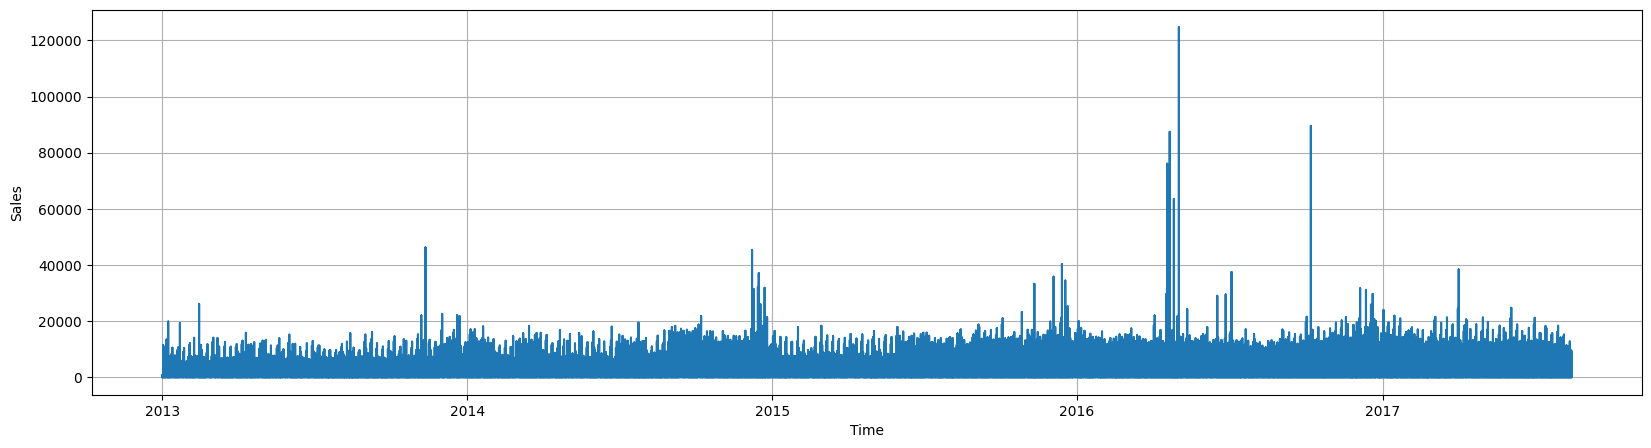

In [ ]:
plot_series(train_data["date"], train_data["sales"], format="-", start=0, end=None)

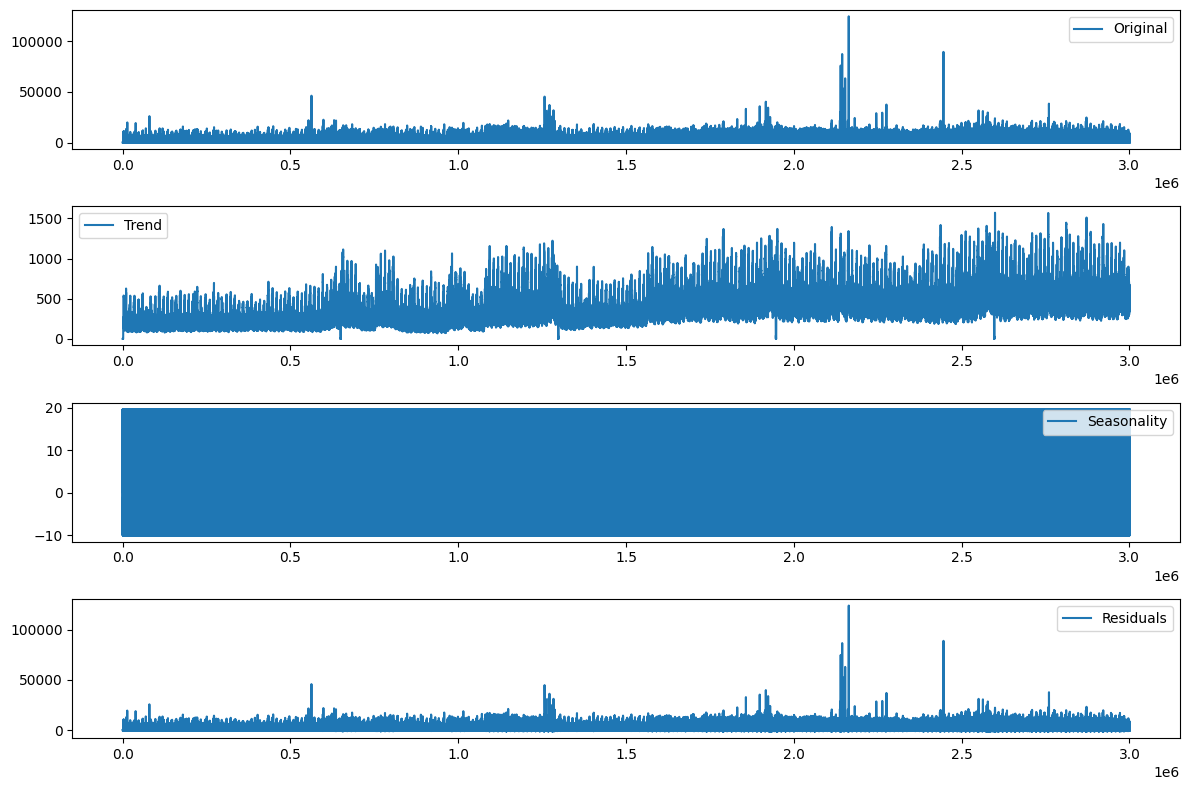

In [ ]:
decomposition = seasonal_decompose(train_data['sales'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(train_data['sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [31]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [ ]:
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['weekend'] = train_data['day_of_week'].isin([5, 6]).astype(int)

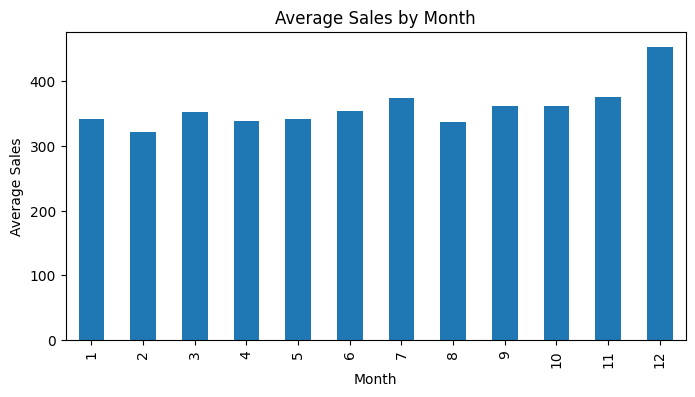

In [ ]:
plt.figure(figsize=(8, 4))
train_data.groupby('month')['sales'].mean().plot(kind='bar')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

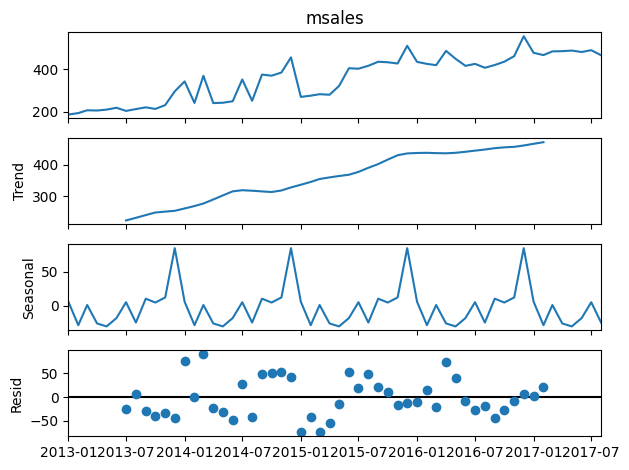

In [ ]:
import statsmodels.api as sm
t_series = train_data.groupby(['date'])['sales'].agg(['mean']).reset_index().rename(columns={'mean': 'msales'})
t_series = t_series.set_index('date')
sample= t_series['msales'].resample('MS').mean()
decomposition = sm.tsa.seasonal_decompose(sample, model='additive')
fig = decomposition.plot()
fig.tight_layout()
plt.show()
plt.close()

In [32]:
for name in train_data.select_dtypes("number"):
        train_data[name] = train_data[name].fillna(train_data[name].median())

for name in train_data.select_dtypes("object"):
        train_data[name] = train_data[name].fillna("None")

In [33]:
train_data = train_data.drop('date', axis=1)

In [34]:
cat = ['store_nbr', 'family']
data = pd.get_dummies(train_data, columns=cat, drop_first=True)

In [13]:
print("train info: \n", data.info(),"\n")
print("train shape: \n", data.shape,"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 88 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   id                                 int64  
 1   sales                              float64
 2   onpromotion                        int64  
 3   store_nbr_2                        uint8  
 4   store_nbr_3                        uint8  
 5   store_nbr_4                        uint8  
 6   store_nbr_5                        uint8  
 7   store_nbr_6                        uint8  
 8   store_nbr_7                        uint8  
 9   store_nbr_8                        uint8  
 10  store_nbr_9                        uint8  
 11  store_nbr_10                       uint8  
 12  store_nbr_11                       uint8  
 13  store_nbr_12                       uint8  
 14  store_nbr_13                       uint8  
 15  store_nbr_14                       uint8  
 16  store_nbr_15      

***4. Deep Learning Model***

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, LeakyReLU
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import Callback

In [14]:
dl_train = data.loc[train_data.index, :]
dl_test = data.loc[test_data.index, :]
dl_test.drop('sales', axis=1, inplace=True)

In [15]:
dl_clean = dl_train.dropna(subset=['sales'])
features = dl_clean.columns.difference(['date'])
X = dl_clean[features].values
y = dl_clean['sales'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_valid = y_scaler.transform(y_valid.reshape(-1, 1))

LSTM **v1**

*The model architecture utilizes a sequential model consisting of an LSTM layer followed by three dense layers. The LSTM layer has 64 units and is designed to capture complex patterns in sequential data. The subsequent dense layers have 32, 16, and 1 units respectively. This architecture is well-suited for tasks involving sequential data, such as time series analysis and sequential prediction. Additionally, the use of dropout layers helps prevent overfitting. Overall, this architecture strikes a balance between capturing complex patterns and preventing overfitting.*

In [ ]:
model = Sequential()

model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dense(32, activation=LeakyReLU(alpha = 0.1), kernel_regularizer = regularizers.l2(1e-4)))
model.add(Dense(16, activation=LeakyReLU(alpha = 0.1), kernel_regularizer = regularizers.l2(1e-4)))
model.add(Dense(1))

optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                39168     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 41793 (163.25 KB)
Trainable params: 41793 (163.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/10
4689/4689 [==============================] - 34s 6ms/step - loss: 0.0318 - accuracy: 0.3129 - val_loss: 0.0262 - val_accuracy: 0.3130
Epoch 2/10
4689/4689 [==============================] - 28s 6ms/step - loss: 0.0249 - accuracy: 0.3129 - val_loss: 0.0241 - val_accuracy: 0.3130
Epoch 3/10
4689/4689 [==============================] - 26s 6ms/step - loss: 0.0231 - accuracy: 0.3129 - val_loss: 0.0223 - val_accuracy: 0.3130
Epoch 4/10
4689/4689 [==============================] - 27s 6ms/step - loss: 0.0218 - accuracy: 0.3129 - val_loss: 0.0213 - val_accuracy: 0.3130
Epoch 5/10
4689/4689 [==============================] - 27s 6ms/step - loss: 0.0207 - accuracy: 0.3129 - val_loss: 0.0202 - val_accuracy: 0.3130
Epoch 6/10
4689/4689 [==============================] - 29s 6ms/step - loss: 0.0197 - accuracy: 0.3129 - val_loss: 0.0195 - val_accuracy: 0.3130
Epoch 7/10
4689/4689 [==============================] - 27s 6ms/step - loss: 0.0188 - accuracy: 0.3129 - val_loss: 0.0183 - val_ac

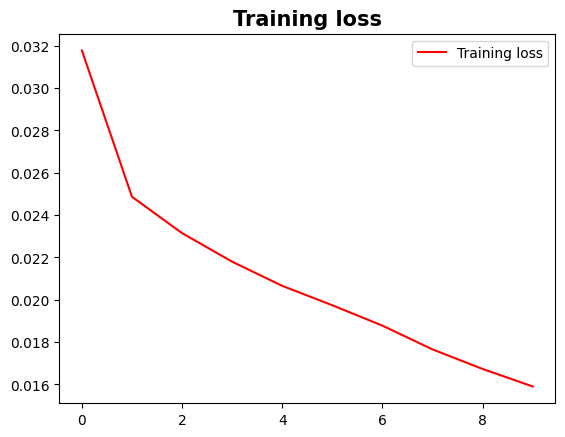

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()
plt.show()

*During the training process, after 10 epochs, the loss was 0.0159 with an accuracy of 31.29%, and the validation loss was 0.0156 with a validation accuracy of 31.30%. This suggests the model's performance was consistent between training and validation datasets.*

In [ ]:
lstm_preds1 = model.predict(X_valid)

18756/18756 [==============================] - 41s 2ms/step


In [ ]:
min_max_scaler1 = MinMaxScaler(feature_range=(0, 196))
lstm_preds1 = min_max_scaler.fit_transform(lstm_preds1)
lstm_preds1

array([[40.96231 ],
       [18.74516 ],
       [23.148014],
       ...,
       [23.063604],
       [25.67435 ],
       [28.91996 ]], dtype=float32)

In [ ]:
lstm_preds1 = np.log1p(lstm_preds1)
lstm_preds1 = np.exp(lstm_preds1)

In [ ]:
lstm_preds_flat1 = lstm_preds1.flatten()
y_valid_flat = y_valid.flatten()
rmsle1 = np.sqrt(mean_squared_log_error(y_valid_flat, lstm_preds_flat1))
print("LSTM RMSLEv1:", rmsle1)

LSTM RMSLEv1: 3.122509765563917


LSTM **v2**

*This modelv2 is created to identify intricate patterns in sequential data and avoid overfitting by incorporating dropout layers. It is may particularly suitable for analyzing sequential data such as time series and sequential prediction tasks. In the LSTM layer, we incorporate 96 units to define the dimensionality of the output space. We set the return_sequences parameter to True to return the last output in the output. Additionally, we include Dropout layers where 20% of the units are dropped. The subsequent step involves adding the Dense layer.*

In [20]:
model2 = Sequential()
model2.add(LSTM(units=96, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model2.add(Dropout(0.2))
model2.add(LSTM(units=96, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=96, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=96))
model2.add(Dropout(0.2))
model2.add(Dense(50, activation=LeakyReLU(alpha = 0.1), kernel_regularizer = regularizers.l2(1e-4)))
model2.add(Dense(units=1))

optimizer = Adam(learning_rate=3e-4)
model2.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 96)             71040     
                                                                 
 dropout_12 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 96)             74112     
                                                                 
 dropout_13 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 96)             74112     
                                                                 
 dropout_14 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_15 (LSTM)              (None, 96)               

In [21]:
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/10
37512/37512 [==============================] - 417s 11ms/step - loss: 4.0697e-05 - accuracy: 0.3129 - val_loss: 1.4560e-06 - val_accuracy: 0.3130
Epoch 2/10
37512/37512 [==============================] - 407s 11ms/step - loss: 2.3678e-06 - accuracy: 0.3129 - val_loss: 1.0255e-06 - val_accuracy: 0.3130
Epoch 3/10
37512/37512 [==============================] - 423s 11ms/step - loss: 2.1026e-06 - accuracy: 0.3129 - val_loss: 1.1973e-06 - val_accuracy: 0.3130
Epoch 4/10
37512/37512 [==============================] - 405s 11ms/step - loss: 1.9567e-06 - accuracy: 0.3129 - val_loss: 1.0583e-06 - val_accuracy: 0.3130
Epoch 5/10
37512/37512 [==============================] - 384s 10ms/step - loss: 1.7604e-06 - accuracy: 0.3129 - val_loss: 1.6764e-06 - val_accuracy: 0.3130
Epoch 6/10
37512/37512 [==============================] - 371s 10ms/step - loss: 1.7085e-06 - accuracy: 0.3129 - val_loss: 9.6183e-07 - val_accuracy: 0.3130
Epoch 7/10
37512/37512 [==============================] - 

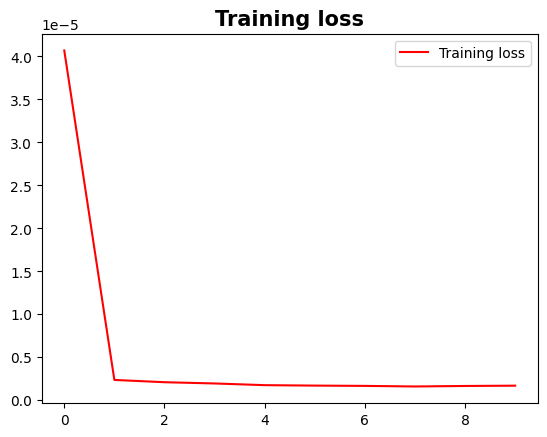

<Figure size 640x480 with 0 Axes>

In [22]:
loss = history2.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()
plt.show()

*After the final epoch of training, the model achieved a loss of 1.2140e-06 on the training data and a validation loss of 6.4021e-07. This indicates that the model has performed well in minimizing the difference between its predictions and the actual values during training.*

In [23]:
lstm_preds = model2.predict(X_valid)

18756/18756 [==============================] - 65s 3ms/step


In [24]:
min_max_scaler = MinMaxScaler(feature_range=(0, 196))
lstm_preds = min_max_scaler.fit_transform(lstm_preds)
lstm_preds

array([[14.242931  ],
       [ 0.11326315],
       [ 1.866145  ],
       ...,
       [ 1.6314698 ],
       [ 3.914689  ],
       [ 7.795549  ]], dtype=float32)

In [25]:
lstm_preds = np.log1p(lstm_preds)
lstm_preds = np.exp(lstm_preds)

In [26]:
lstm_preds_flat = lstm_preds.flatten()
y_valid_flat = y_valid.flatten()
rmsle = np.sqrt(mean_squared_log_error(y_valid_flat, lstm_preds_flat))
print("LSTM RMSLE:", rmsle)

LSTM RMSLE: 1.228146824108779


***5. Conclusions***

In [35]:
for name in test_data.select_dtypes("number"):
        test_data[name] = test_data[name].fillna(test_data[name].median())

for name in test_data.select_dtypes("object"):
        test_data[name] = test_data[name].fillna("None")
test_data = test_data.drop('date', axis=1)
cat = ['store_nbr', 'family']
test = pd.get_dummies(test_data, columns=cat, drop_first=True)

In [36]:
test['sales'] = 0

X_test = test[features].values
X_test = scaler.transform(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
predictions = model2.predict(X_test)
predictions

891/891 [==============================] - 9s 9ms/step


array([[0.05895219],
       [0.1523044 ],
       [0.15246741],
       ...,
       [0.14809848],
       [0.14923958],
       [0.14740416]], dtype=float32)

In [37]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 196))
predictions_scaled = min_max_scaler.fit_transform(predictions)
predictions_scaled = np.log1p(predictions_scaled)
predictions_scaled = np.exp(predictions_scaled)
predictions_scaled

array([[ 73.75757],
       [188.5188 ],
       [188.7192 ],
       ...,
       [183.3483 ],
       [184.75108],
       [182.49472]], dtype=float32)

In [38]:
output = pd.DataFrame({'id': test.index, 'sales': predictions_scaled.flatten()})
output = output.drop_duplicates(subset=['id'], keep='last')
output['id'] = output['id'] + 3000888
output = output.groupby('id')['sales'].mean().reset_index()
output.to_csv('submission.csv', index=False)
output

,id,sales
0,3000888,73.757568
1,3000889,188.518799
2,3000890,188.719193
3,3000891,189.902267
4,3000892,188.454895
...,...,...
28507,3029395,183.843445
28508,3029396,183.374863
28509,3029397,183.348297
28510,3029398,184.751083


In [ ]:
!pwd

/content


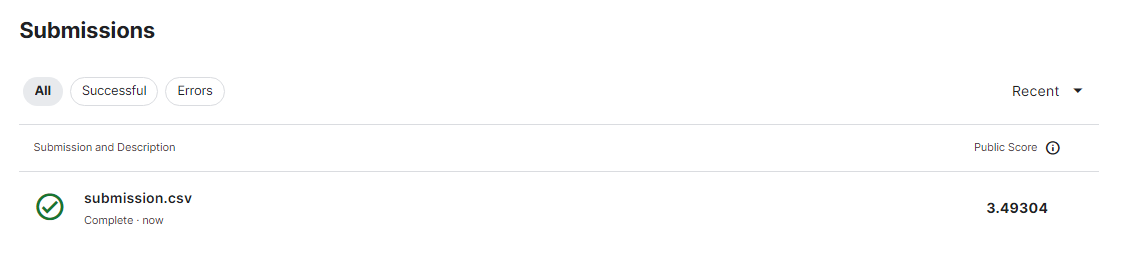

*In conclusion, the high Root Mean Squared Logarithmic Error indicates that the predictive model is struggling to accurately capture data patterns. One of the key reasons for this is the presence of missing values and variance in important features.*

*Upon analysis, it was found that crucial features such as holidays, transactions, oil, and store data have a significant number of missing values. This incomplete information could be contributing to the variability in predictions. The model may struggle to learn and identify patterns effectively due to these gaps in data.*

*To address this issue, it's important to assess the model's robustness using techniques like cross-validation and ensemble methods. Additionally, tackling missing values in crucial features and refining the representation of influential variables can help in enhancing the model's accuracy. Regular evaluation, adjusting model parameters, and exploring new features or data sources are also essential for improving the predictive model and achieving better Root Mean Squared Logarithmic Error scores.*